# Zipf's Law

- 자연어 corpus에서 단어들을 빈도가 높은 순서대로 나열했을 때, 모든 단어의 사용 빈도는 순위에 반비례한다.
- 즉 1위 단어는 2위 단어보다 빈도가 2배 높고, 3위 단어보다는 3배 높다. 약 135개의 단어로 전체 corpus의 절반 표현 가능.
- 자연어만이 아니라 인구 순위, 기업 크기, 소득 순위 등의 분야에서도 같은 법칙이 발견됨.
- 이 법칙이 적용되는 조건은 아래 식에서 b가 1일 때 적용 가능하다.
    + $R = a * b\log n$
    + 데이터의 순위 R, 해당 데이터의 값 n, 그리고 상수값 a, b

## 1. 구현

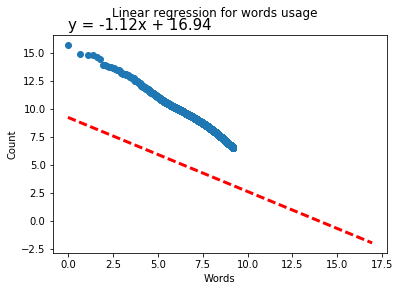

In [1]:
from scipy.stats import linregress
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import operator

def main():    
    words_cnt = read_data()
    rank = [math.log(i+1) for i in range(len(words_cnt))]
    [slope, intercept] = do_linear_regression(rank, words_cnt)
    draw_chart(rank, words_cnt, slope, intercept)
    return slope, intercept

def read_data():
    words_cnt = []
    with open("words.txt") as fp:
        for line in fp:
            [word, cnt] = line.split(',')
            words_cnt.append(math.log(int(cnt)))
    return np.array(sorted(words_cnt, reverse=True))

def draw_chart(X, Y, slope, intercept):
    fig = plt.figure()
    fig.suptitle("Linear regression for words usage")
    ax = fig.add_subplot(111)
    ax.set_xlabel("Words")
    ax.set_ylabel("Count")
    plt.scatter(X, Y)
    
    min_X = min(X)
    max_X = max(X)
    min_Y = min_X * slope + intercept
    max_Y = min_Y * slope + intercept
    plt.plot([min_X, min_Y], [max_X, max_Y], color="red", linestyle="--", linewidth=3.0)
    ax.text(min_X, min_Y+0.1, 'y = %.2lfx + %.2lf' % (slope, intercept), fontsize=15)
    
    plt.show()
    plt.close()

def do_linear_regression(X, Y):
    slope, intercept, r, p, std_err = linregress(X, Y)
    return slope, intercept

if __name__ == "__main__":
    main()


데이터와 rank를 모두 log화해서 벡터화 하고 linear regression 모델에 넣었다. 위 처럼 선형 회귀식이 나온다.